In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [28]:
def processar_dados_ano(caminho_arquivo, escolas_comuns):
    df = pd.read_csv(caminho_arquivo, encoding='latin1', delimiter=';')
    df = df[df['CO_ENTIDADE'].isin(escolas_comuns)]  # Filtra por escolas comuns a todos os anos
    colunas_para_remover = [col for col in df.columns if (col.startswith('DS_') or col.startswith('NU_') or col.startswith('DT_') or col.startswith('CO_') or col.startswith('NO_')) and col != 'NU_ANO_CENSO']
    df_limpo = df.drop(columns=colunas_para_remover).drop(columns=['SG_UF'])
    colunas_com_nan = df_limpo.columns[df_limpo.isnull().any()].tolist()
    return df_limpo, colunas_com_nan

# Inicialize o conjunto de identificadores de escolas com os dados do primeiro ano
diretorio = 'dataset/'
primeiro_ano = 2014
caminho_arquivo = f'{diretorio}microdados_ed_basica_{primeiro_ano}_alagoas.csv'
df_primeiro_ano = pd.read_csv(caminho_arquivo, encoding='latin1', delimiter=';')
escolas_comuns = set(df_primeiro_ano['CO_ENTIDADE'].unique())

# Encontre a interseção com os dados dos anos subsequentes
for ano in range(primeiro_ano + 1, 2022):
    caminho_arquivo = f'{diretorio}microdados_ed_basica_{ano}_alagoas.csv'
    df = pd.read_csv(caminho_arquivo, encoding='latin1', delimiter=';')
    escolas_comuns = escolas_comuns.intersection(set(df['CO_ENTIDADE'].unique()))

# Agora você tem um conjunto 'escolas_comuns' com as escolas presentes em todos os anos

dfs = []  # Lista para armazenar os DataFrames limpos

# Processa cada arquivo, mantendo apenas as escolas presentes em todos os anos
for ano in range(primeiro_ano, 2022):
    caminho_arquivo = f'{diretorio}microdados_ed_basica_{ano}_alagoas.csv'
    df_limpo, colunas_com_nan = processar_dados_ano(caminho_arquivo, escolas_comuns)
    dfs.append(df_limpo)  # Adiciona o DataFrame limpo à lista
    # (Opcional) Imprimir resumo dos dados
    print(f"Resumo dos dados de {ano}:")
    print(colunas_com_nan)
    print("--------------------------------------------------------------------\n")
    print(df_limpo.describe())

Resumo dos dados de 2014:
[]
--------------------------------------------------------------------

       NU_ANO_CENSO  TP_DEPENDENCIA  TP_CATEGORIA_ESCOLA_PRIVADA  \
count        2956.0     2956.000000                  2956.000000   
mean         2014.0        3.000677                     0.149188   
std             0.0        0.488791                     0.506208   
min          2014.0        1.000000                     0.000000   
25%          2014.0        3.000000                     0.000000   
50%          2014.0        3.000000                     0.000000   
75%          2014.0        3.000000                     0.000000   
max          2014.0        4.000000                     4.000000   

       TP_LOCALIZACAO  TP_LOCALIZACAO_DIFERENCIADA  TP_SITUACAO_FUNCIONAMENTO  \
count     2956.000000                  2956.000000                2956.000000   
mean         1.514208                     0.088295                   1.044317   
std          0.499883                     0.4

In [29]:
df_consolidado = pd.concat(dfs)
df_consolidado.to_csv('df_consolidado.csv', index=False)

In [53]:
correlacao = df_consolidado.corr()

limiar_correlacao = 0.7
correlacoes_fortes = correlacao[(np.abs(correlacao) > limiar_correlacao) & (correlacao != 1.0)]

variaveis_fortes = correlacoes_fortes.dropna(axis=0, how='all').dropna(axis=1, how='all')
# variaveis_fortes_lista = variaveis_fortes.index.tolist()

variaveis_fortes.to_csv('correlacao.csv', index=True)
# print(len(variaveis_fortes_lista))
x = df['QT_MAT_BAS'].to_list()
print(x)

[319, 109, 326, 239, 648, 985, 829, 474, 534, 602, 562, 351, 689, 245, 245, 260, 134, 159, 20, 52, 63, 59, 315, 101, 130, 582, 155, 53, 83, 177, 333, 176, 46, 0, 324, 116, 396, 838, 645, 556, 0, 621, 185, 756, 347, 575, 957, 1126, 393, 680, 257, 567, 1186, 271, 2045, 594, 429, 569, 323, 943, 290, 302, 358, 368, 118, 552, 570, 360, 91, 259, 683, 401, 355, 399, 1173, 600, 178, 375, 255, 232, 396, 254, 656, 1317, 357, 812, 410, 526, 211, 829, 528, 283, 92, 164, 467, 781, 496, 341, 806, 346, 313, 330, 107, 710, 924, 17, 0, 737, 921, 155, 153, 0, 0, 480, 416, 24, 95, 0, 58, 36, 216, 441, 89, 31, 77, 0, 136, 331, 0, 772, 0, 260, 261, 226, 43, 16, 0, 0, 0, 0, 136, 135, 856, 71, 104, 171, 211, 195, 517, 350, 112, 358, 0, 53, 329, 60, 50, 148, 0, 151, 102, 90, 117, 55, 0, 43, 213, 134, 81, 81, 285, 143, 91, 521, 551, 222, 71, 789, 256, 131, 363, 100, 34, 772, 369, 162, 39, 229, 372, 648, 337, 317, 132, 0, 0, 358, 62, 415, 286, 371, 175, 0, 109, 656, 1302, 426, 729, 675, 40, 193, 239, 263, 802, 

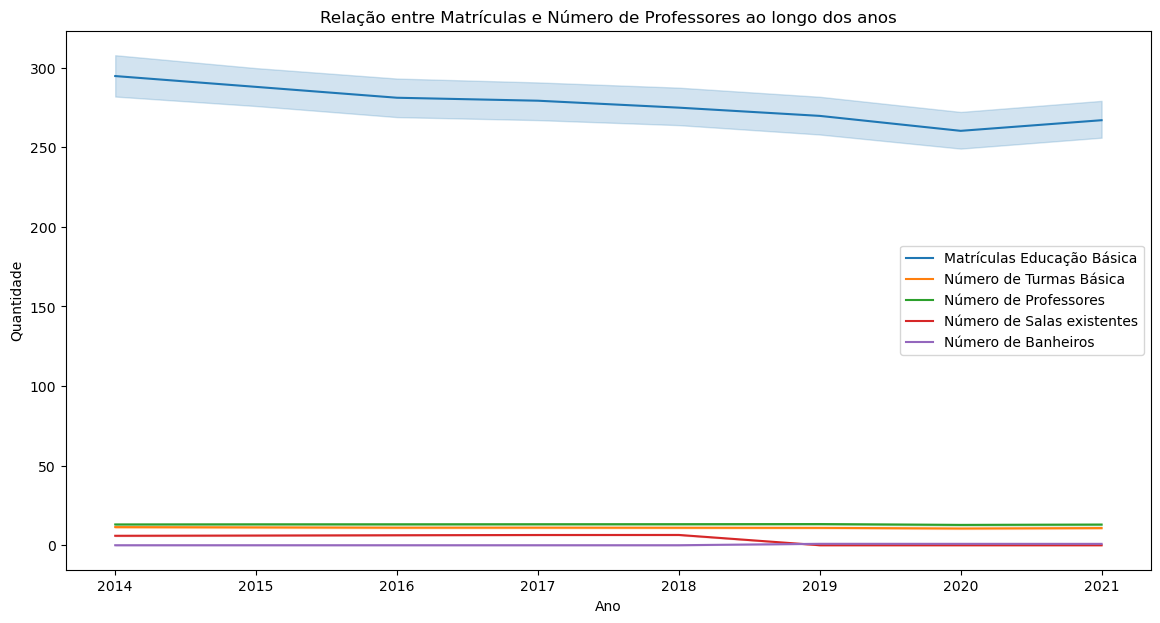

In [48]:
plt.figure(figsize=(14,7))

sns.lineplot(data=df_consolidado, x='NU_ANO_CENSO', y='QT_MAT_BAS', label='Matrículas Educação Básica')
sns.lineplot(data=df_consolidado, x='NU_ANO_CENSO', y='QT_TUR_BAS', label='Número de Turmas Básica')
sns.lineplot(data=df_consolidado, x='NU_ANO_CENSO', y='QT_DOC_BAS', label='Número de Professores')
sns.lineplot(data=df_consolidado, x='NU_ANO_CENSO', y='QT_SALAS_EXISTENTES', label='Número de Salas existentes')
sns.lineplot(data=df_consolidado, x='NU_ANO_CENSO', y='IN_BANHEIRO', label='Número de Banheiros')


plt.title('Relação entre Matrículas e Número de Professores ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

plt.legend()
plt.show()
